In [92]:
import pandas as pd
import time
import datetime 
import re 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Load the dataset

ireland_water_data = pd.read_csv(r'E:\dataset\water_quality\Water Quality Monitoring Dataset_ Ireland.csv')

# Display basic information about the dataset and check for missing values
ireland_water_data_info = ireland_water_data.info()
ireland_null_values_summary = ireland_water_data.isnull().sum() 

ireland_water_data_info, ireland_null_values_summary # Display the information and missing values summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29159 entries, 0 to 29158
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WaterbodyName                         29159 non-null  object 
 1   Years                                 29159 non-null  int64  
 2   SampleDate                            29159 non-null  object 
 3   Alkalinity-total (as CaCO3)           29159 non-null  float64
 4   Ammonia-Total (as N)                  29159 non-null  float64
 5   BOD - 5 days (Total)                  29159 non-null  float64
 6   Chloride                              29159 non-null  float64
 7   Conductivity @25°C                    29159 non-null  float64
 8   Dissolved Oxygen                      29159 non-null  float64
 9   ortho-Phosphate (as P) - unspecified  29159 non-null  float64
 10  pH                                    29159 non-null  float64
 11  Temperature    

(None,
 WaterbodyName                           0
 Years                                   0
 SampleDate                              0
 Alkalinity-total (as CaCO3)             0
 Ammonia-Total (as N)                    0
 BOD - 5 days (Total)                    0
 Chloride                                0
 Conductivity @25°C                      0
 Dissolved Oxygen                        0
 ortho-Phosphate (as P) - unspecified    0
 pH                                      0
 Temperature                             0
 Total Hardness (as CaCO3)               0
 True Colour                             0
 dtype: int64)

In [11]:
unique_waterbodies = ireland_water_data['WaterbodyName'].unique()

print(unique_waterbodies)

['ABBEYTOWN_010' 'Allua' 'ASKANAGAP STREAM_010' 'AVONMORE_040'
 'BALLAGHAMUCK_010' 'Ballinhassig East' 'Ballinhassig West'
 'BALLYCREEN BROOK_020' 'Ballyshannon East' 'BEHY (NORTH MAYO)_010'
 'BELLAWADDY_010' 'BELLAWADDY_020' 'Belmullet' 'Bray Lower' 'Bredagh'
 'BURN DAURNETT_010' 'CAMCOR_020' 'CAMCOR_050' 'Carrick on Shannon'
 'CARRIGAHORIG STREAM_010' 'CARRIGANS_010'
 'CARROWKERIBLY LOUGH STREAM_010' 'Castlebar' 'CASTLEBAR_010'
 'CASTLEBAR_020' 'CASTLEBAR_030' 'CASTLEBAR_040' 'Clare-Corrib'
 'CLAREEN STREAM/FUARAWN_020' 'CLOGHAUN_010' 'Clonaslee West'
 'CLOONAGHMORE_010' 'CLOONAGHMORE_020' 'CLOONAGHMORE_030'
 'CLOONAGHMORE_040' 'CLOONAGHMORE_060' 'CLOONLAVIS_010'
 'CLYDAGH (CASTLEBAR)_010' 'CLYDAGH (CASTLEBAR)_020' 'Cong-Robe' 'Conn'
 'CORROY_010' 'CREEVY_010' 'CROSS ROADS STREAM_010' 'Cullin' 'DARGLE_010'
 'DARGLE_020' 'DARGLE_030' 'DARGLE_040' 'DEEL (CROSSMOLINA)_020'
 'DEEL (CROSSMOLINA)_040' 'DEEL (CROSSMOLINA)_050' 'Derg DL' 'DUVOWEN_010'
 'EIGNAGH_010' 'EIGNAGH_030' 'FINN (DONE

In [70]:
original_waterbodies = list(ireland_water_data['WaterbodyName'].unique())
print(original_waterbodies)


['ABBEYTOWN_010', 'Allua', 'ASKANAGAP STREAM_010', 'AVONMORE_040', 'BALLAGHAMUCK_010', 'Ballinhassig East', 'Ballinhassig West', 'BALLYCREEN BROOK_020', 'Ballyshannon East', 'BEHY (NORTH MAYO)_010', 'BELLAWADDY_010', 'BELLAWADDY_020', 'Belmullet', 'Bray Lower', 'Bredagh', 'BURN DAURNETT_010', 'CAMCOR_020', 'CAMCOR_050', 'Carrick on Shannon', 'CARRIGAHORIG STREAM_010', 'CARRIGANS_010', 'CARROWKERIBLY LOUGH STREAM_010', 'Castlebar', 'CASTLEBAR_010', 'CASTLEBAR_020', 'CASTLEBAR_030', 'CASTLEBAR_040', 'Clare-Corrib', 'CLAREEN STREAM/FUARAWN_020', 'CLOGHAUN_010', 'Clonaslee West', 'CLOONAGHMORE_010', 'CLOONAGHMORE_020', 'CLOONAGHMORE_030', 'CLOONAGHMORE_040', 'CLOONAGHMORE_060', 'CLOONLAVIS_010', 'CLYDAGH (CASTLEBAR)_010', 'CLYDAGH (CASTLEBAR)_020', 'Cong-Robe', 'Conn', 'CORROY_010', 'CREEVY_010', 'CROSS ROADS STREAM_010', 'Cullin', 'DARGLE_010', 'DARGLE_020', 'DARGLE_030', 'DARGLE_040', 'DEEL (CROSSMOLINA)_020', 'DEEL (CROSSMOLINA)_040', 'DEEL (CROSSMOLINA)_050', 'Derg DL', 'DUVOWEN_010', 

In [72]:
def clean_waterbody_name(name):
    # Replace underscores with spaces and keep numbers that follow important identifiers
    cleaned_name = re.sub(r'_+', ' ', name)  # Replace underscores with spaces
    cleaned_name = re.sub(r'(?<![a-zA-Z])(\d+)', r'\1', cleaned_name)  # Retain numbers if attached to names
    cleaned_name = cleaned_name.title()  # Capitalize for readability
    return cleaned_name.strip()

# Apply this function to your dataset
cleaned_names = [clean_waterbody_name(name) for name in original_waterbodies]
print("Cleaned names:", cleaned_names)

Cleaned names: ['Abbeytown 010', 'Allua', 'Askanagap Stream 010', 'Avonmore 040', 'Ballaghamuck 010', 'Ballinhassig East', 'Ballinhassig West', 'Ballycreen Brook 020', 'Ballyshannon East', 'Behy (North Mayo) 010', 'Bellawaddy 010', 'Bellawaddy 020', 'Belmullet', 'Bray Lower', 'Bredagh', 'Burn Daurnett 010', 'Camcor 020', 'Camcor 050', 'Carrick On Shannon', 'Carrigahorig Stream 010', 'Carrigans 010', 'Carrowkeribly Lough Stream 010', 'Castlebar', 'Castlebar 010', 'Castlebar 020', 'Castlebar 030', 'Castlebar 040', 'Clare-Corrib', 'Clareen Stream/Fuarawn 020', 'Cloghaun 010', 'Clonaslee West', 'Cloonaghmore 010', 'Cloonaghmore 020', 'Cloonaghmore 030', 'Cloonaghmore 040', 'Cloonaghmore 060', 'Cloonlavis 010', 'Clydagh (Castlebar) 010', 'Clydagh (Castlebar) 020', 'Cong-Robe', 'Conn', 'Corroy 010', 'Creevy 010', 'Cross Roads Stream 010', 'Cullin', 'Dargle 010', 'Dargle 020', 'Dargle 030', 'Dargle 040', 'Deel (Crossmolina) 020', 'Deel (Crossmolina) 040', 'Deel (Crossmolina) 050', 'Derg Dl', 

In [74]:
ireland_water_data['CleanedWaterbodyName'] = ireland_water_data['WaterbodyName'].apply(clean_waterbody_name)

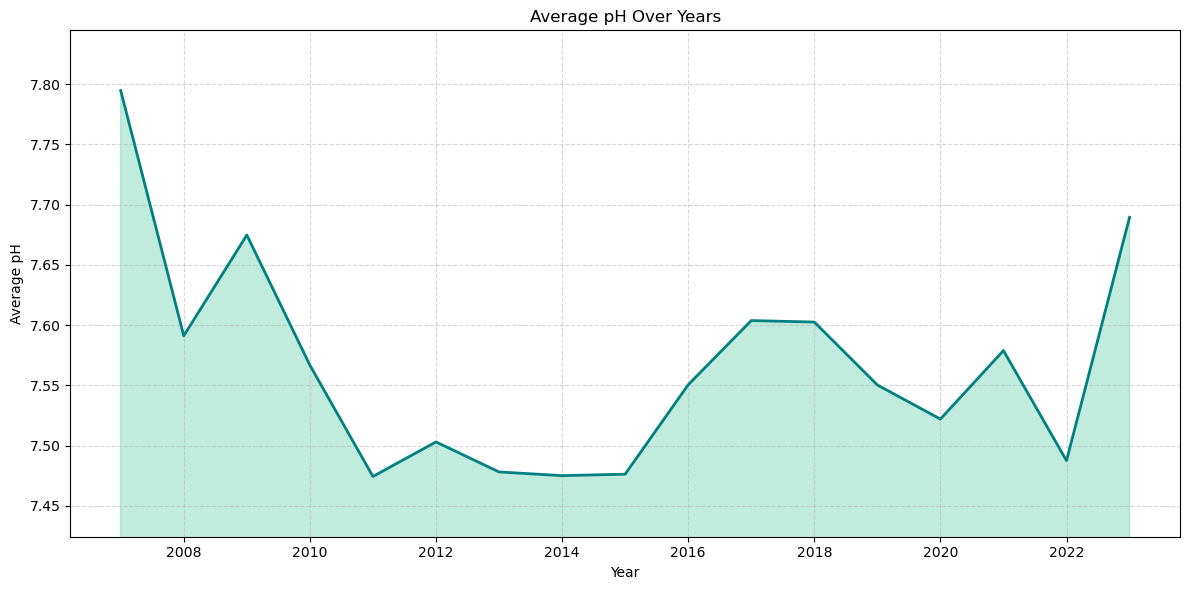

In [102]:

# Group by 'Years' and calculate the mean pH for each year
grouped_data = ireland_water_data.groupby('Years')['pH'].mean().reset_index()

# Extract x and y values
x = grouped_data['Years']
y = grouped_data['pH']

# Create the plot
plt.figure(figsize=(12, 6))
plt.fill_between(x, y, color='mediumaquamarine', alpha=0.4)
plt.plot(x, y, color='teal', linewidth=2)

# Labels and title
plt.title("Average pH Over Years")
plt.xlabel("Year")
plt.ylabel("Average pH")

# Optional: set y-axis limits similar to LightningChart visual range
plt.ylim(min(y) - 0.05, max(y) + 0.05)

# Show grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.tight_layout()
plt.show()


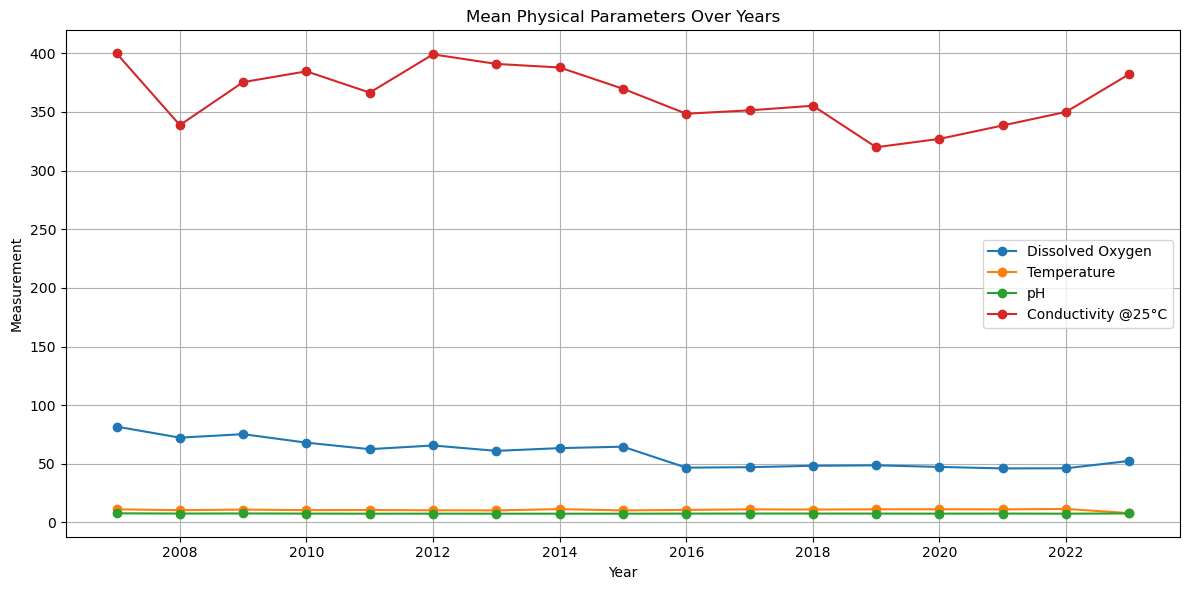

In [76]:
# Convert 'SamplingDate' to datetime and extract Year
if 'SamplingDate' in ireland_water_data.columns:
    ireland_water_data['Years'] = pd.to_datetime(ireland_water_data['SamplingDate'], errors='coerce').dt.year

# Drop missing years
ireland_water_data = ireland_water_data.dropna(subset=['Years'])

# ---------------------- Physical Parameters Plot -----------------------
physical_params = ['Dissolved Oxygen', 'Temperature', 'pH', 'Conductivity @25°C']
grouped_physical = ireland_water_data.groupby('Years')[physical_params].mean().reset_index()

plt.figure(figsize=(12, 6))
for param in physical_params:
    plt.plot(grouped_physical['Years'], grouped_physical[param], marker='o', label=param)

plt.title('Mean Physical Parameters Over Years')
plt.xlabel('Year')
plt.ylabel('Measurement')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

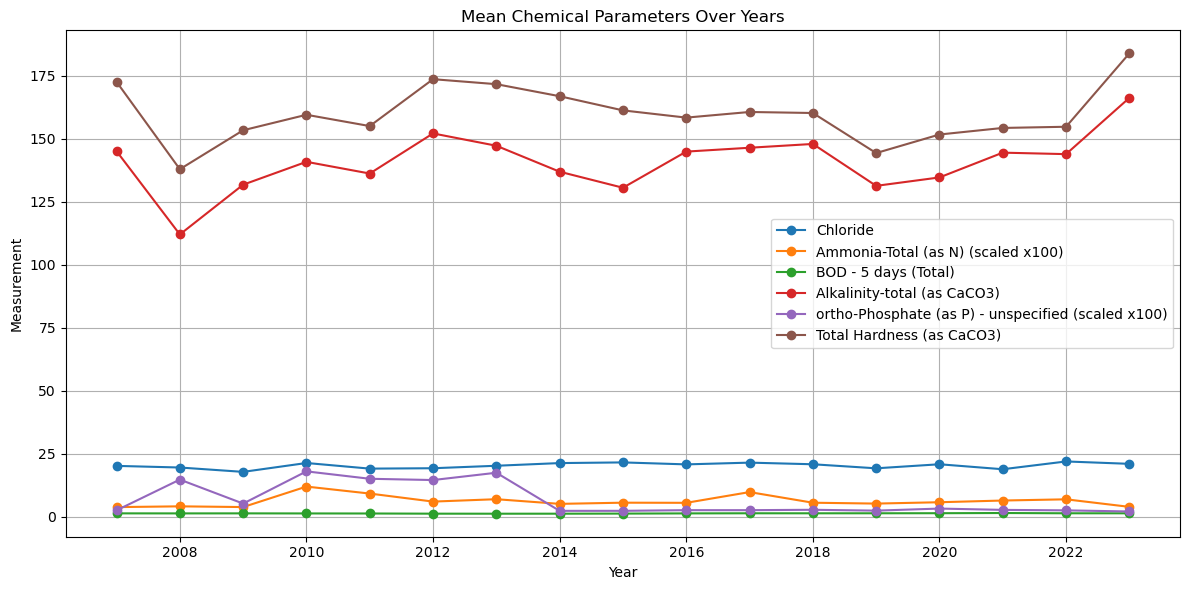

In [21]:
# ---------------------- Chemical Parameters Plot -----------------------
chemical_params = ['Chloride', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)',
                   'Alkalinity-total (as CaCO3)', 'ortho-Phosphate (as P) - unspecified',
                   'Total Hardness (as CaCO3)']

grouped_chemical = ireland_water_data.groupby('Years')[chemical_params].mean().reset_index()

# Apply scaling
scaling_factor = 100
grouped_chemical['Ammonia-Total (as N)'] *= scaling_factor
grouped_chemical['ortho-Phosphate (as P) - unspecified'] *= scaling_factor

plt.figure(figsize=(12, 6))
for param in chemical_params:
    label = f"{param} (scaled x{scaling_factor})" if param in [
        'Ammonia-Total (as N)', 'ortho-Phosphate (as P) - unspecified'] else param
    plt.plot(grouped_chemical['Years'], grouped_chemical[param], marker='o', label=label)

plt.title('Mean Chemical Parameters Over Years')
plt.xlabel('Year')
plt.ylabel('Measurement')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

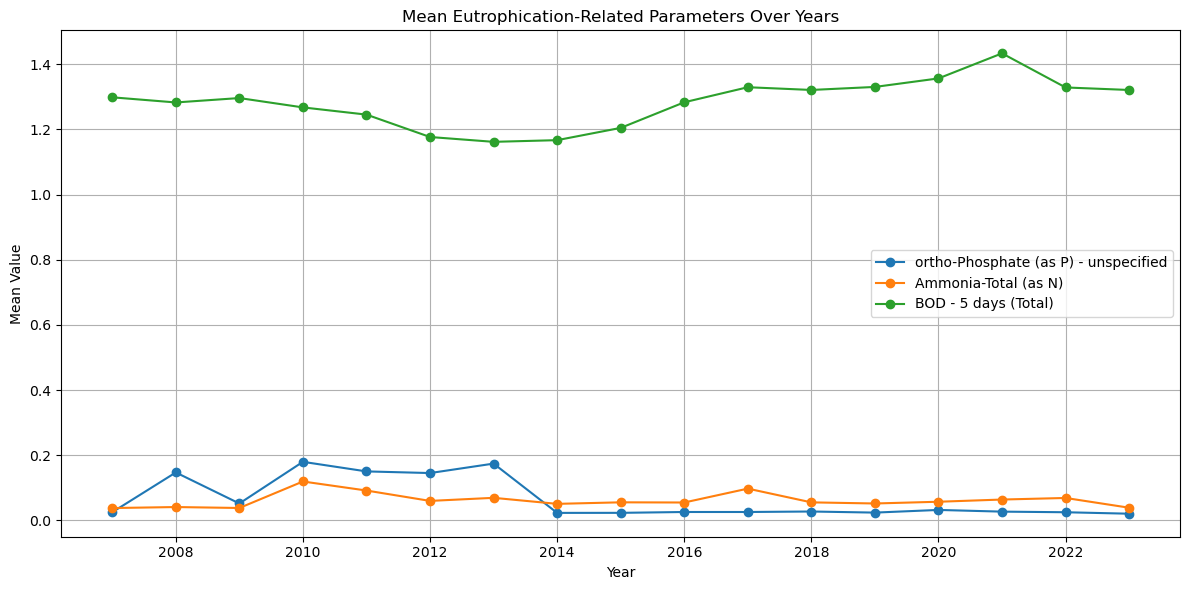

In [78]:
# Define eutrophication-related parameters
parameters = ['ortho-Phosphate (as P) - unspecified', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)']

# Group by 'Years' and calculate mean values
grouped_data = ireland_water_data.groupby('Years')[parameters].mean().reset_index()

# Plot using matplotlib
plt.figure(figsize=(12, 6))

for parameter in parameters:
    plt.plot(grouped_data['Years'], grouped_data[parameter], marker='o', label=parameter)

plt.title('Mean Eutrophication-Related Parameters Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

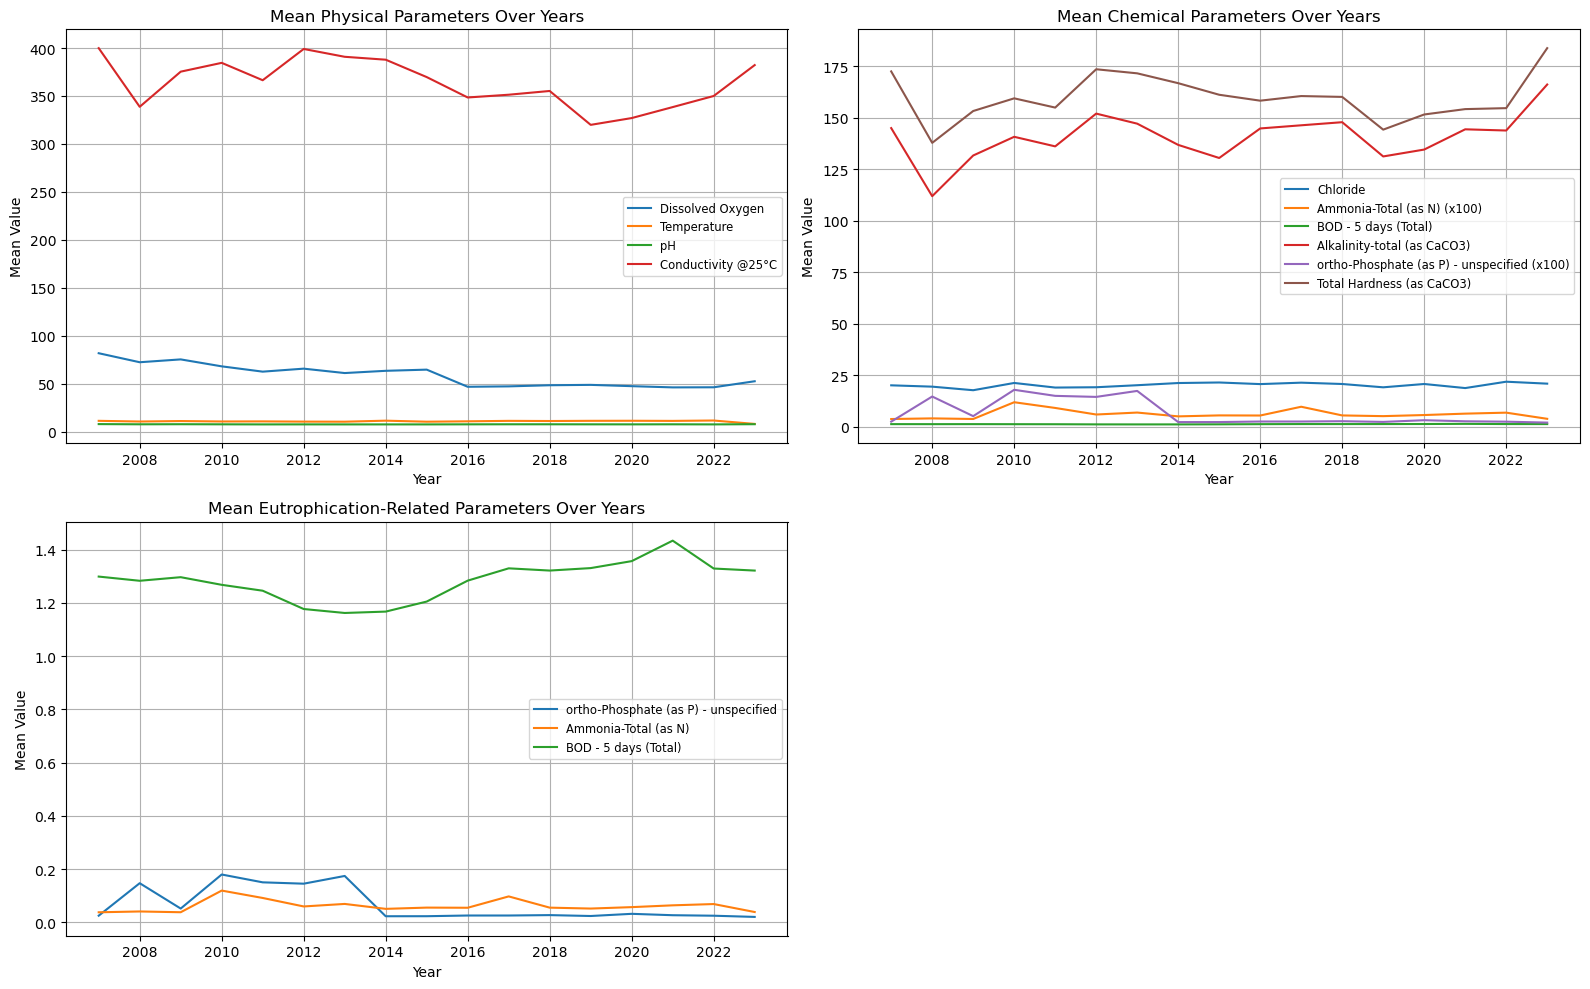

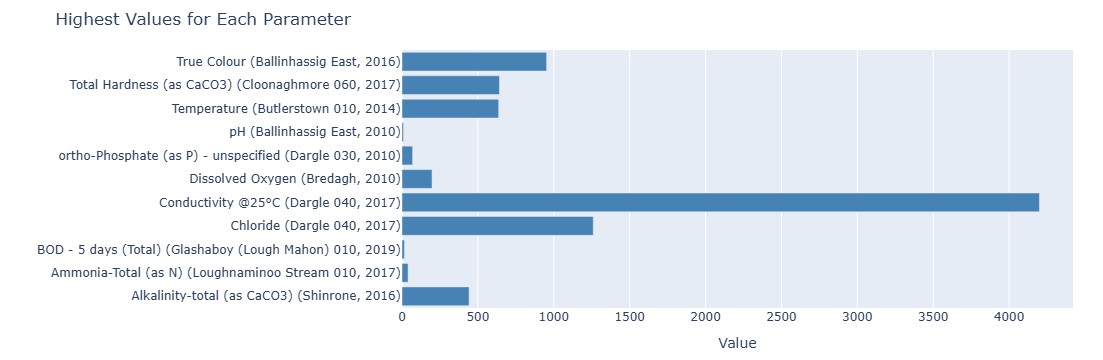

In [82]:
# Define parameters
physical_params = ['Dissolved Oxygen', 'Temperature', 'pH', 'Conductivity @25°C']
chemical_params = ['Chloride', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 
                   'Alkalinity-total (as CaCO3)', 'ortho-Phosphate (as P) - unspecified', 
                   'Total Hardness (as CaCO3)']
eutrophication_params = ['ortho-Phosphate (as P) - unspecified', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)']
highest_value_params = ['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 
                        'Chloride', 'Conductivity @25°C', 'Dissolved Oxygen', 
                        'ortho-Phosphate (as P) - unspecified', 'pH', 'Temperature', 
                        'Total Hardness (as CaCO3)', 'True Colour']

scaling_factors = {
    'Ammonia-Total (as N)': 100,
    'ortho-Phosphate (as P) - unspecified': 100
}

# --- Line Chart Creation Function ---
def plot_line_chart(ax, title, parameters, data, scaling=None):
    grouped_data = data.groupby('Years')[parameters].mean().reset_index()

    for param in parameters:
        y = grouped_data[param]
        if scaling and param in scaling:
            y = y * scaling[param]
            label = f"{param} (x{scaling[param]})"
        else:
            label = param
        ax.plot(grouped_data['Years'], y, label=label)
    
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean Value")
    ax.grid(True)
    ax.legend(fontsize='small')

# --- Bar Chart Creation (Plotly) ---
def plot_bar_chart(data, parameters):
    categories = []
    values = []
    
    for param in parameters:
        row = data.loc[data[param].idxmax()]
        label = f"{param} ({row['CleanedWaterbodyName']}, {row['Years']})"
        categories.append(label)
        values.append(row[param])
    
    fig = go.Figure(go.Bar(
        x=values,
        y=categories,
        orientation='h',
        marker_color='steelblue'
    ))
    fig.update_layout(
        title='Highest Values for Each Parameter',
        xaxis_title='Value',
        yaxis_title='',
        margin=dict(l=150, r=30, t=50, b=30)
    )
    fig.show()

# --- Dashboard Layout (2x2 Grid) ---
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2)

# Physical Parameters Chart
ax1 = fig.add_subplot(gs[0, 0])
plot_line_chart(ax1, "Mean Physical Parameters Over Years", physical_params, ireland_water_data)

# Chemical Parameters Chart
ax2 = fig.add_subplot(gs[0, 1])
plot_line_chart(ax2, "Mean Chemical Parameters Over Years", chemical_params, ireland_water_data, scaling=scaling_factors)

# Eutrophication Parameters Chart
ax3 = fig.add_subplot(gs[1, 0])
plot_line_chart(ax3, "Mean Eutrophication-Related Parameters Over Years", eutrophication_params, ireland_water_data)

plt.tight_layout()
plt.show()

# Horizontal bar chart for max values (right-bottom)
plot_bar_chart(ireland_water_data, highest_value_params)

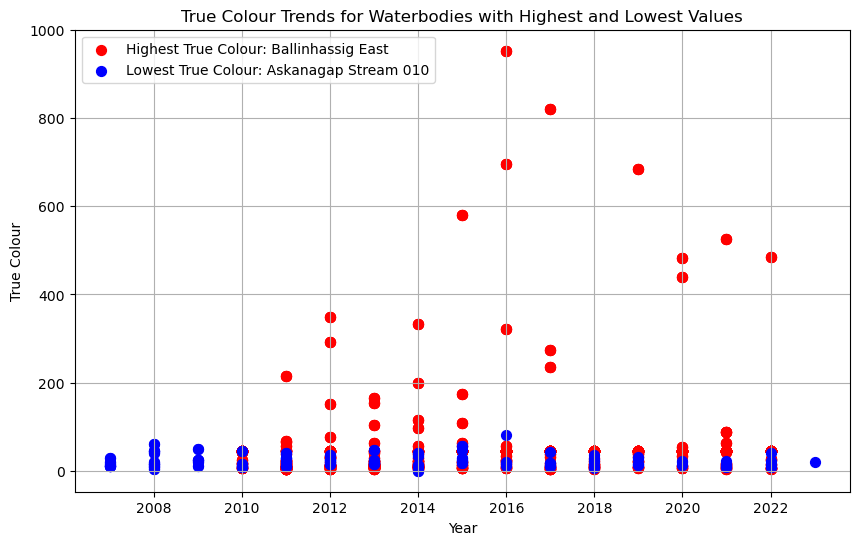

In [84]:


# Find max and min True Colour rows
max_true_color_row = ireland_water_data.loc[ireland_water_data['True Colour'].idxmax()]   
min_true_color_row = ireland_water_data.loc[ireland_water_data['True Colour'].idxmin()]

max_true_color_waterbody = max_true_color_row['CleanedWaterbodyName']  
min_true_color_waterbody = min_true_color_row['CleanedWaterbodyName']

# Filter data for these waterbodies
high_true_color_data = ireland_water_data[ireland_water_data['CleanedWaterbodyName'] == max_true_color_waterbody]
low_true_color_data = ireland_water_data[ireland_water_data['CleanedWaterbodyName'] == min_true_color_waterbody]

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(high_true_color_data['Years'], high_true_color_data['True Colour'], color='red', label=f'Highest True Colour: {max_true_color_waterbody}', s=50)
plt.scatter(low_true_color_data['Years'], low_true_color_data['True Colour'], color='blue', label=f'Lowest True Colour: {min_true_color_waterbody}', s=50)

plt.title('True Colour Trends for Waterbodies with Highest and Lowest Values')
plt.xlabel('Year')
plt.ylabel('True Colour')
plt.legend(loc='best')
plt.grid(True)

plt.show()


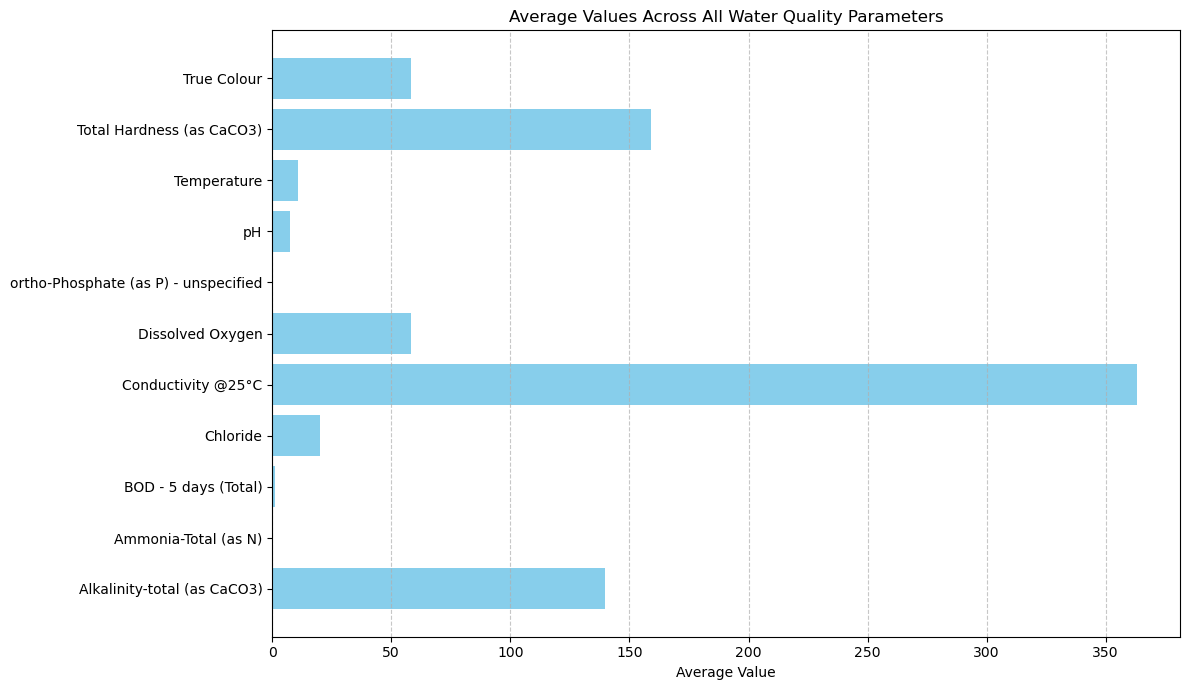

In [31]:
# Parameters list
parameters = ['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 'Chloride', 
              'Conductivity @25°C', 'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH', 
              'Temperature', 'Total Hardness (as CaCO3)', 'True Colour']

# Calculate average values for each parameter
average_values = [ireland_water_data[param].mean() for param in parameters]

# Plot horizontal bar chart
plt.figure(figsize=(12, 7))
plt.barh(parameters, average_values, color='skyblue')
plt.xlabel('Average Value')
plt.title('Average Values Across All Water Quality Parameters')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

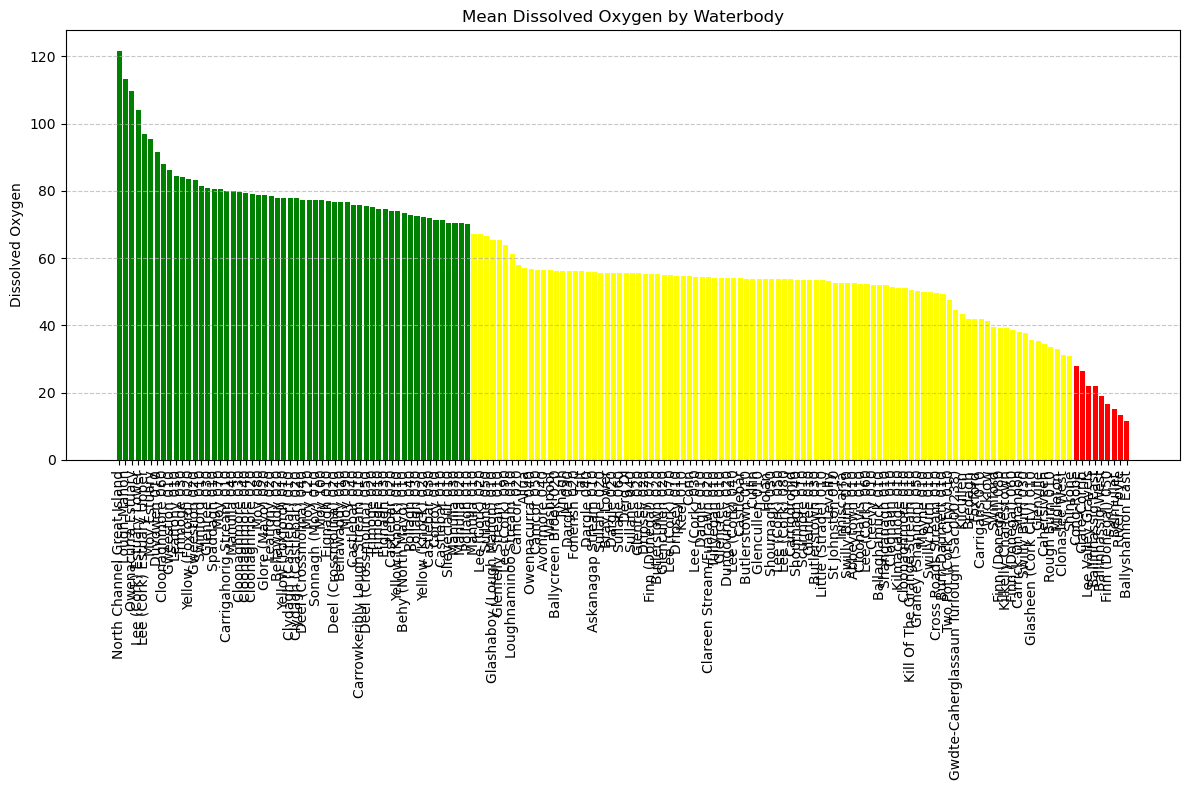

In [86]:
# Group by waterbody and calculate mean Dissolved Oxygen
parameter = 'Dissolved Oxygen'
grouped_by_waterbody = ireland_water_data.groupby('CleanedWaterbodyName')[parameter].mean().reset_index()

# Sort descending by Dissolved Oxygen
grouped_by_waterbody = grouped_by_waterbody.sort_values(by=parameter, ascending=False)

# Prepare data
categories = grouped_by_waterbody['CleanedWaterbodyName']
values = grouped_by_waterbody[parameter]

# Define colors based on value ranges
def get_color(value):
    if value <= 30:
        return 'red'       # Low oxygen
    elif value <= 70:
        return 'yellow'    # Moderate oxygen
    elif value <= 122:
        return 'green'     # Healthy oxygen
    else:
        return 'blue'      # Above max (if any)

colors = [get_color(v) for v in values]

plt.figure(figsize=(12, 8))
bars = plt.bar(categories, values, color=colors)

plt.title('Mean Dissolved Oxygen by Waterbody')
plt.ylabel('Dissolved Oxygen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

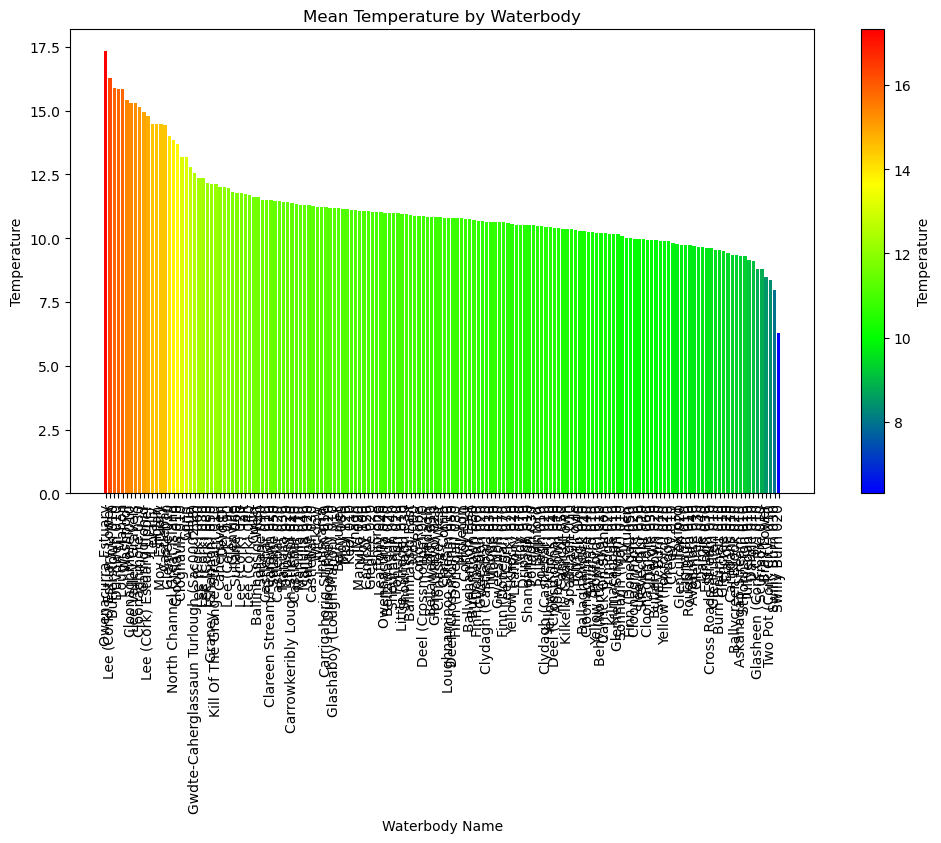

In [41]:
# Group data by CleanedWaterbodyName and calculate the mean of Temperature
parameter = 'Temperature'
grouped_by_waterbody = ireland_water_data.groupby('CleanedWaterbodyName')[parameter].mean().reset_index()

# Sort descending by temperature
grouped_by_waterbody = grouped_by_waterbody.sort_values(by=parameter, ascending=False)

# Extract categories and values
categories = grouped_by_waterbody['CleanedWaterbodyName'].tolist()
values = grouped_by_waterbody[parameter].tolist()

# Normalize values for coloring between 0 and 1
norm = plt.Normalize(min(values), max(values))

# Create a colormap that mimics your gradient: Blue -> Green -> Yellow -> Red
from matplotlib.colors import LinearSegmentedColormap

colors_list = [(0, 0, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0)]  # blue, green, yellow, red
cmap = LinearSegmentedColormap.from_list("temp_gradient", colors_list)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar colors by mapping temperature values to colormap
bar_colors = cmap(norm(values))

# Create vertical bar chart
bars = ax.bar(categories, values, color=bar_colors)

# Rotate x-axis labels 90 degrees and add padding
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)  # Add bottom margin for long labels

# Set chart title and axis labels
ax.set_title('Mean Temperature by Waterbody')
ax.set_ylabel('Temperature')
ax.set_xlabel('Waterbody Name')

# Remove value labels above bars (like set_value_label_display_mode('hidden'))

# Optional: Add colorbar legend for temperature scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Temperature')

plt.show()

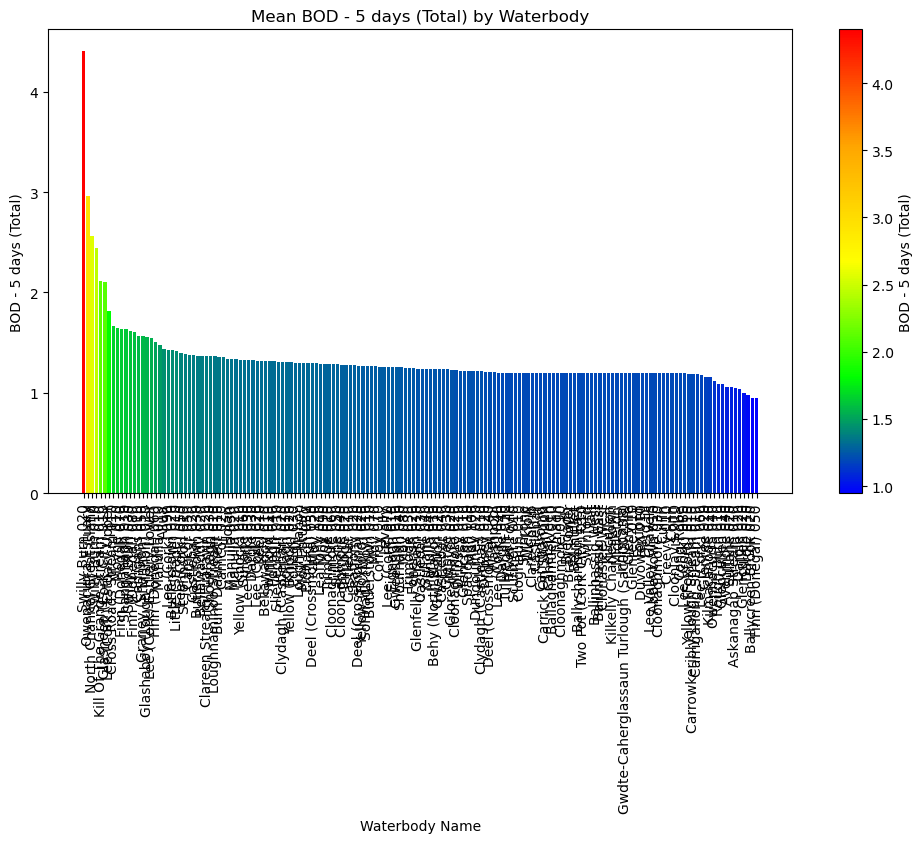

In [49]:
# Group data by CleanedWaterbodyName and calculate the mean of BOD - 5 days (Total)
parameter = 'BOD - 5 days (Total)'
grouped_by_waterbody = ireland_water_data.groupby('CleanedWaterbodyName')[parameter].mean().reset_index()

# Sort descending by BOD values
grouped_by_waterbody = grouped_by_waterbody.sort_values(by=parameter, ascending=False)

# Extract categories and values
categories = grouped_by_waterbody['CleanedWaterbodyName'].tolist()
values = grouped_by_waterbody[parameter].tolist()

# Normalize values between min and max for coloring
norm = plt.Normalize(min(values), max(values))

# Create a colormap that mimics your gradient:
# Blue -> Green -> Yellow -> Orange -> Red
colors_list = [
    (0, 0, 1),        # Blue
    (0, 1, 0),        # Green
    (1, 1, 0),        # Yellow
    (1, 165/255, 0),  # Orange
    (1, 0, 0)         # Red
]
cmap = LinearSegmentedColormap.from_list("bod_gradient", colors_list)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Map BOD values to colors
bar_colors = cmap(norm(values))

# Create vertical bar chart
bars = ax.bar(categories, values, color=bar_colors)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)  # Add bottom margin for long labels

# Set titles and labels
ax.set_title('Mean BOD - 5 days (Total) by Waterbody')
ax.set_ylabel('BOD - 5 days (Total)')
ax.set_xlabel('Waterbody Name')

# Hide value labels on bars (do not annotate bars)

# Add colorbar as legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('BOD - 5 days (Total)')

plt.show()

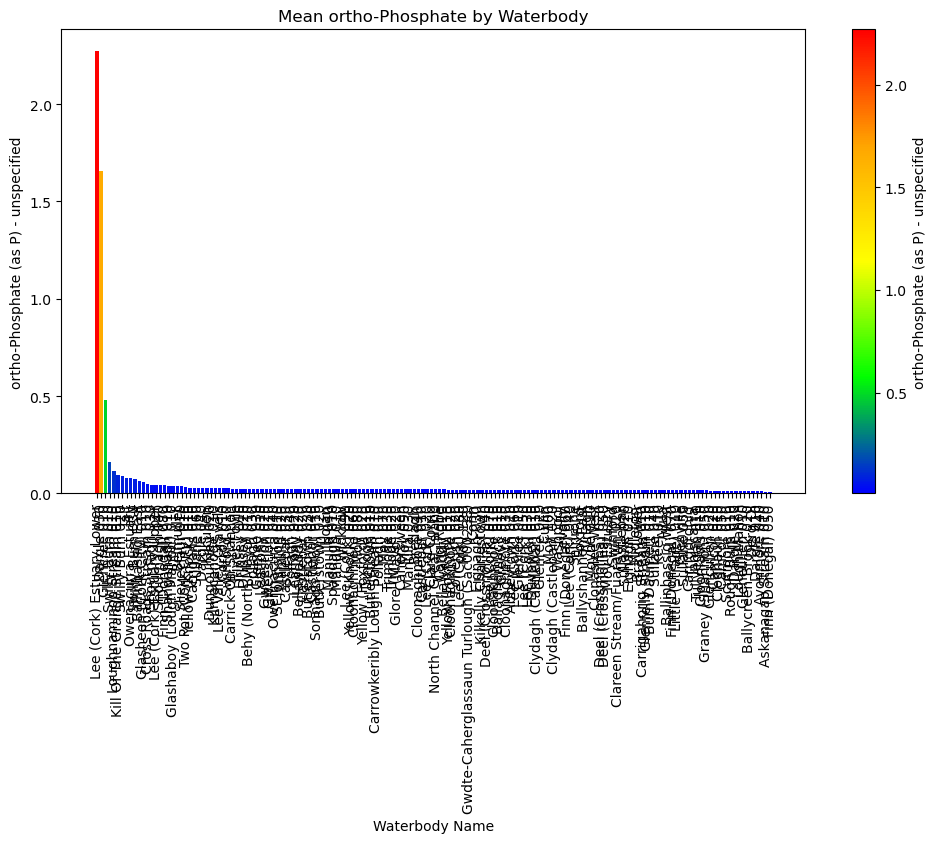

In [51]:
# Group data by CleanedWaterbodyName and calculate the mean of ortho-Phosphate (as P) - unspecified
parameter = 'ortho-Phosphate (as P) - unspecified'
grouped_by_waterbody = ireland_water_data.groupby('CleanedWaterbodyName')[parameter].mean().reset_index()

# Sort descending by ortho-Phosphate values
grouped_by_waterbody = grouped_by_waterbody.sort_values(by=parameter, ascending=False)

# Extract categories and values
categories = grouped_by_waterbody['CleanedWaterbodyName'].tolist()
values = grouped_by_waterbody[parameter].tolist()

# Normalize values between min and max for coloring
norm = plt.Normalize(min(values), max(values))

# Define color gradient similar to your original chart
colors_list = [
    (0, 0, 1),        # Blue
    (0, 1, 0),        # Green
    (1, 1, 0),        # Yellow
    (1, 165/255, 0),  # Orange
    (1, 0, 0)         # Red
]
cmap = LinearSegmentedColormap.from_list("ortho_phosphate_gradient", colors_list)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Map values to colors using the colormap
bar_colors = cmap(norm(values))

# Create vertical bar chart
bars = ax.bar(categories, values, color=bar_colors)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)  # Add bottom margin for long labels

# Set titles and labels
ax.set_title('Mean ortho-Phosphate by Waterbody')
ax.set_ylabel('ortho-Phosphate (as P) - unspecified')
ax.set_xlabel('Waterbody Name')

# Hide value labels (no annotations)

# Add colorbar as legend for gradient interpretation
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('ortho-Phosphate (as P) - unspecified')

plt.show()

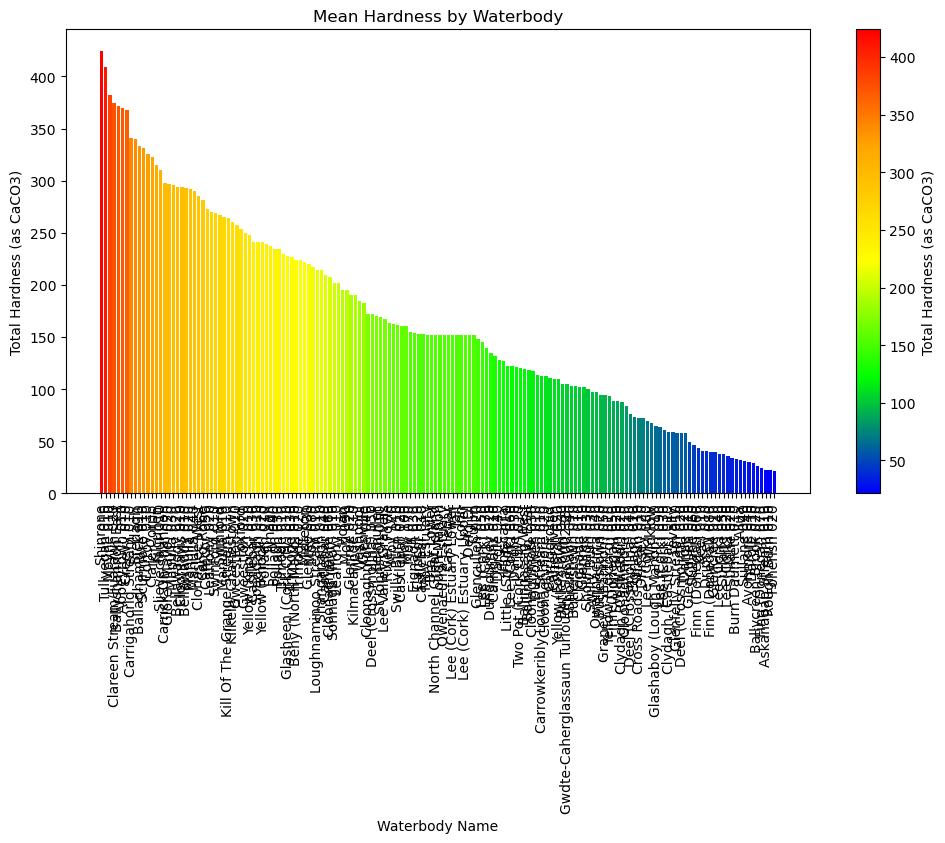

In [55]:
# Group data by CleanedWaterbodyName and calculate the mean of Total Hardness (as CaCO3)
parameter = 'Total Hardness (as CaCO3)'
grouped_by_waterbody = ireland_water_data.groupby('CleanedWaterbodyName')[parameter].mean().reset_index()

# Sort descending by hardness values
grouped_by_waterbody = grouped_by_waterbody.sort_values(by=parameter, ascending=False)

# Extract categories and values
categories = grouped_by_waterbody['CleanedWaterbodyName'].tolist()
values = grouped_by_waterbody[parameter].tolist()

# Normalize values between min and max for coloring
norm = plt.Normalize(min(values), max(values))

# Define color gradient matching your original steps
colors_list = [
    (0, 0, 1),        # Blue for soft water
    (0, 1, 0),        # Green for moderately soft water
    (1, 1, 0),        # Yellow for moderately hard water
    (1, 165/255, 0),  # Orange for hard water
    (1, 0, 0)         # Red for very hard water
]
cmap = LinearSegmentedColormap.from_list("hardness_gradient", colors_list)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Map values to colors using the colormap
bar_colors = cmap(norm(values))

# Create vertical bar chart
bars = ax.bar(categories, values, color=bar_colors)

# Rotate x-axis labels 90 degrees for readability
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)  # Add margin for label clarity

# Set titles and labels
ax.set_title('Mean Hardness by Waterbody')
ax.set_ylabel('Total Hardness (as CaCO3)')
ax.set_xlabel('Waterbody Name')

# Hide value labels (no annotations)

# Add colorbar as legend for gradient interpretation
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Total Hardness (as CaCO3)')

plt.show()

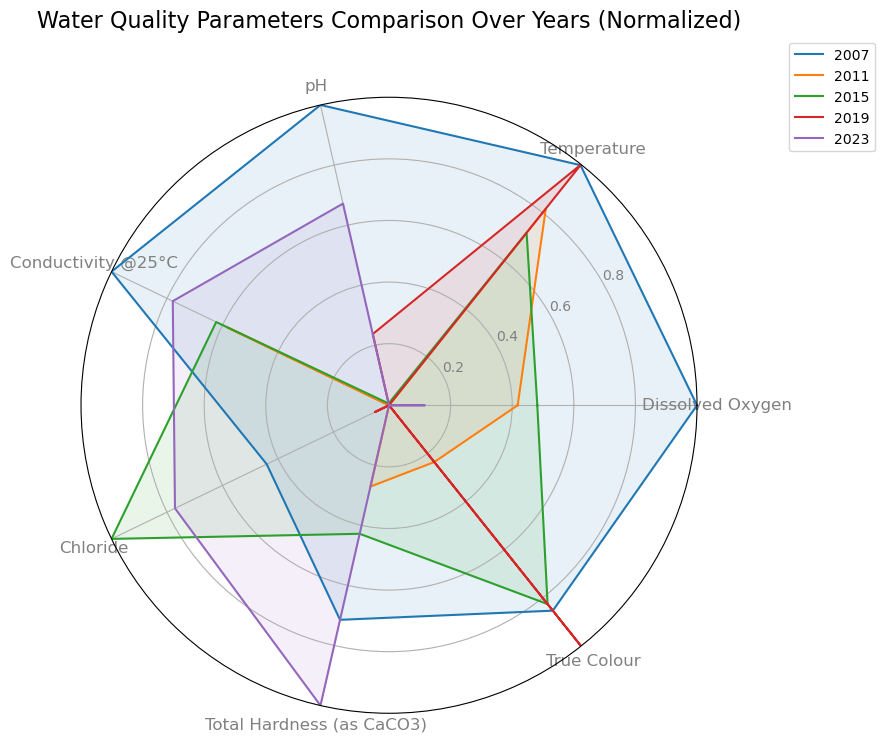

In [94]:

# Parameters and years as before
time_periods = [2007, 2011, 2015, 2019, 2023]
parameters = ['Dissolved Oxygen', 'Temperature', 'pH', 'Conductivity @25°C', 'Chloride', 'Total Hardness (as CaCO3)', 'True Colour']

# Collect average values per year in a dataframe for easier normalization
data_list = []
for year in time_periods:
    data_for_year = ireland_water_data[ireland_water_data['Years'] == year]
    averages = [data_for_year[param].mean() for param in parameters]
    data_list.append(averages)

df_avg = pd.DataFrame(data_list, columns=parameters, index=time_periods)

# Normalize data between 0 and 1 per parameter (column-wise normalization)
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_avg), columns=parameters, index=time_periods)

# Radar chart setup
num_vars = len(parameters)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.title('Water Quality Parameters Comparison Over Years (Normalized)', size=16, y=1.1)
plt.xticks(angles[:-1], parameters, color='grey', size=12)

ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color="grey", size=10)
plt.ylim(0, 1)

for year in time_periods:
    values = df_norm.loc[year].tolist()
    values += values[:1]
    ax.plot(angles, values, label=str(year))
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()
